In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer

In [2]:
movies = pd.read_csv('movie_dataset.csv')
movies.drop(["production_companies_number" , "production_countries_number" ,"spoken_languages_number","release_date" ] , axis=1)

C:\Users\Asus\AppData\Local\Temp\ipykernel_22532\3626107560.py:1: DtypeWarning: Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movie_dataset.csv')


,id,budget,genres,year,original_language,original_title,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,2,0,Drama|Crime,1988,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,0,69.0,suomi,Released,NaN,Ariel,7.1,40
1,3,0,Drama|Comedy,1986,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,0,76.0,English,Released,NaN,Shadows in Paradise,7.0,32
2,5,4000000,Crime|Comedy,1995,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,4300000,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485
3,6,0,Action|Thriller|Crime,1993,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,12136938,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69
4,8,42000,Documentary,2006,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,0,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329039,469215,0,Documentary|History|TV Movie,NaN,en,The Day Hitler Died,The story of Hitler’s final hours told by peop...,0.0045,History Channel,United States of America,0,46.0,Deutsch,Released,"April 30th, 1945",The Day Hitler Died,7.0,1
329040,469216,0,NaN,NaN,de,Mobb Deep - Life of the Infamous: The Videos,NaN,0.00045,Sony Music Entertainmant,United States of America,0,NaN,English,Released,NaN,Mobb Deep - Life of the Infamous: The Videos,9.0,1
329041,469217,0,Drama|Comedy,NaN,en,#idiot,"In the modern day pursuit of fame and fortune,...",1.37217,none,Malaysia,0,11.0,English,Released,NaN,#idiot,0.0,0
329042,469218,0,Drama|Comedy,NaN,en,Conspiracy P.I.E,Director Levi A. Taylor invites you on a nosta...,0.0096,none,United States of America,0,12.0,English,Released,NaN,Conspiracy P.I.E,0.0,0


In [3]:
movies.head()

,id,budget,genres,year,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,1988,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,69.0,suomi,Released,NaN,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,1986,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,76.0,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,1995,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,1993,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,2006,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5


In [4]:
movies.isna().sum()

id                                  0
budget                              0
genres                         121529
year                           328133
original_language                 203
original_title                      1
overview                        50985
popularity                          0
production_companies                0
production_countries                0
release_date                    24046
revenue                             0
runtime                         36792
spoken_languages                 4460
status                           1988
tagline                        276115
title                               1
vote_average                        0
vote_count                          0
production_companies_number         0
production_countries_number         0
spoken_languages_number             0
dtype: int64

In [5]:
movies.dropna(inplace= True)

In [6]:
movies.isna().sum()


id                             0
budget                         0
genres                         0
year                           0
original_language              0
original_title                 0
overview                       0
popularity                     0
production_companies           0
production_countries           0
release_date                   0
revenue                        0
runtime                        0
spoken_languages               0
status                         0
tagline                        0
title                          0
vote_average                   0
vote_count                     0
production_companies_number    0
production_countries_number    0
spoken_languages_number        0
dtype: int64

In [8]:
movies.duplicated().sum()

0

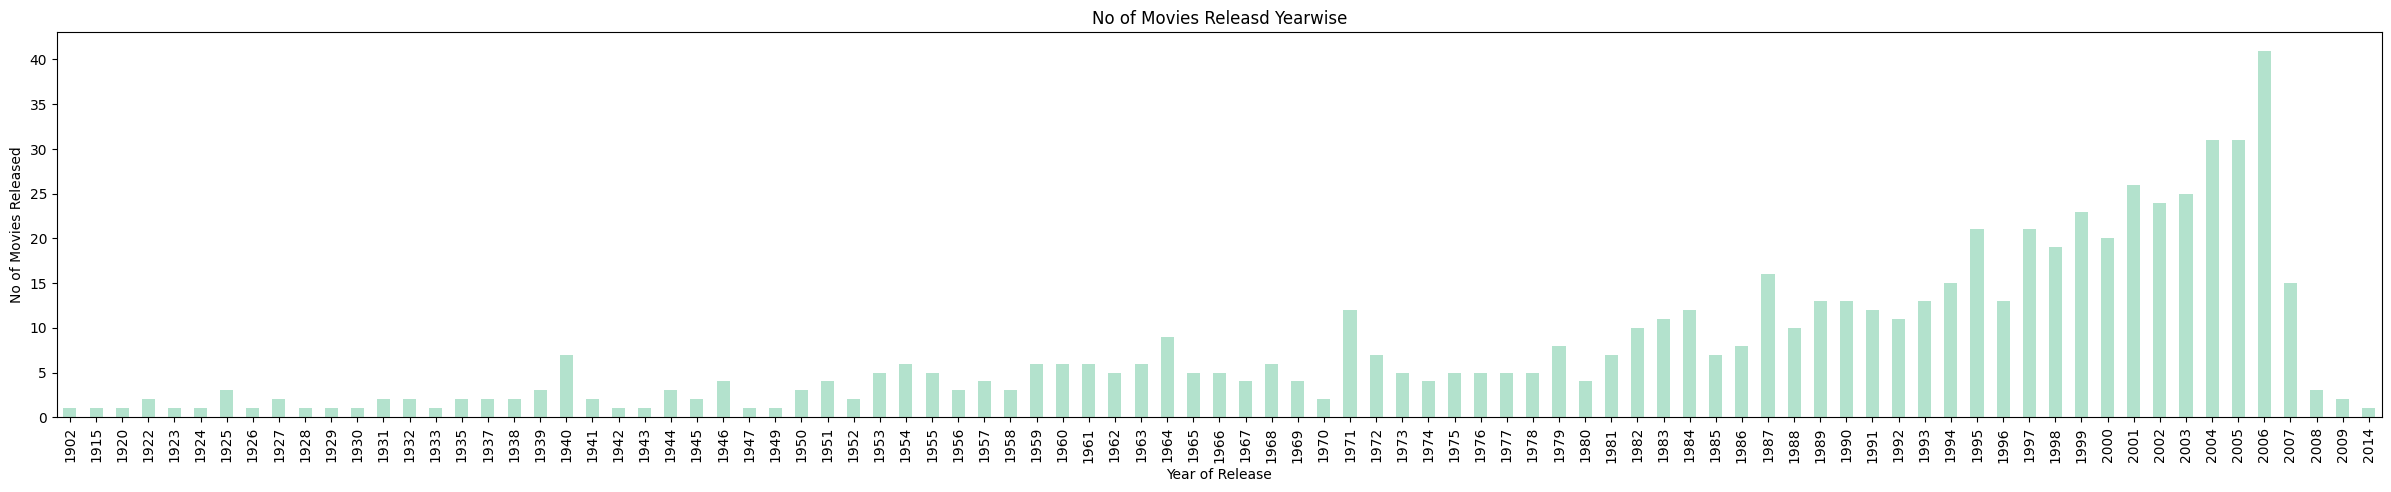

In [26]:
movies.groupby('year').count()['original_title'].plot(kind='bar',figsize=(30,5),cmap='Pastel2')
plt.xlabel('Year of Release')
plt.ylabel('No of Movies Released')
plt.title('No of Movies Releasd Yearwise')
plt.show()

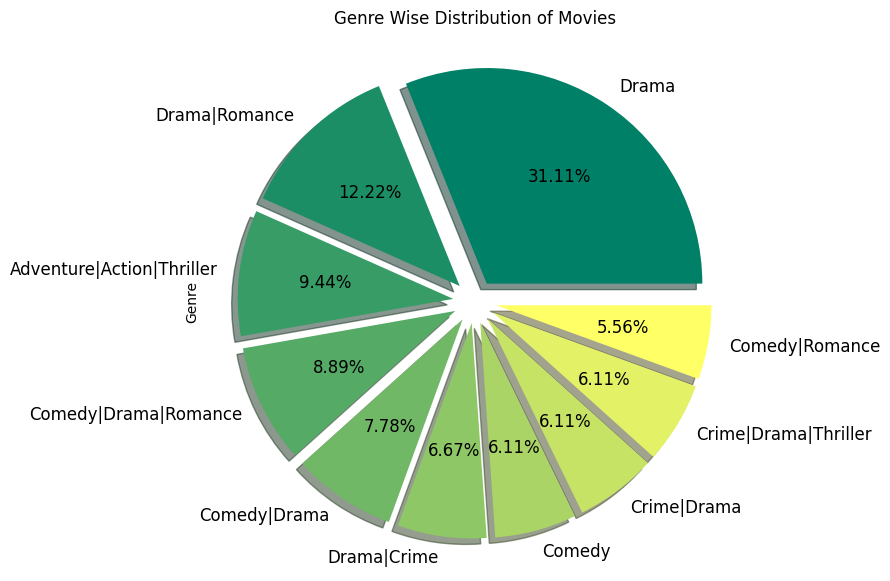

In [10]:
movies['genres'].value_counts()[:10].plot(kind='pie',explode=np.full(10,0.1),fontsize=12,autopct='%3.2f%%',
                                       shadow=True,cmap='summer',figsize=(10,7))
plt.title('Genre Wise Distribution of Movies')
plt.ylabel('Genre')
plt.show()

In [11]:
def calculate_metascore(average_vote):
    return (average_vote / 10) * 100
movies['metascore'] = movies['vote_average'].apply(calculate_metascore)

In [12]:
movies

,id,budget,genres,year,original_language,original_title,overview,popularity,production_companies,production_countries,...,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number,metascore
2,5,4000000,Crime|Comedy,1995,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1,65.0
3,6,0,Action|Thriller|Crime,1993,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1,65.0
4,8,42000,Documentary,2006,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5,64.0
6,11,11000000,Adventure|Action|Science Fiction,1977,en,Star Wars,Princess Leia is captured and held hostage by ...,10.492614,Lucasfilm,United States of America,...,English,Released,"A long time ago in a galaxy far, far away...",Star Wars,8.0,6168,2,1,1,80.0
7,12,94000000,Animation|Family,2003,en,Finding Nemo,"Nemo, an adventurous young clownfish, is unexp...",9.915573,Pixar Animation Studios,United States of America,...,English,Released,"There are 3.7 trillion fish in the ocean, they...",Finding Nemo,7.6,5531,1,1,1,76.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,1368,15000000,Action|Adventure|Thriller|War,1982,en,First Blood,When former Green Beret John Rambo is harassed...,4.291164,Orion Pictures,United States of America,...,English,Released,This time he's fighting for his life.,First Blood,7.2,1376,1,1,1,72.0
907,1369,44000000,Action|Adventure|Thriller|War,1985,en,Rambo: First Blood Part II,John Rambo is released from prison by the gove...,2.757429,TriStar Pictures,United States of America,...,English,Released,"What most people call hell, he calls home.",Rambo: First Blood Part II,6.2,800,2,1,2,62.0
908,1370,63000000,Action|Adventure|Thriller|War,1988,en,Rambo III,"Combat has taken its toll on Rambo, but he's f...",2.789634,TriStar Pictures,United States of America,...,English,Released,The first was for himself. The second for his ...,Rambo III,5.6,638,2,1,2,56.0
909,1371,17000000,Drama,1982,en,Rocky III,"Now the world champion, Rocky Balboa is living...",2.652225,United Artists,United States of America,...,English,Released,The greatest challenge.,Rocky III,6.6,809,1,1,1,66.0


Text(0.5, 1.0, "Movies Appreciated by Critic's")

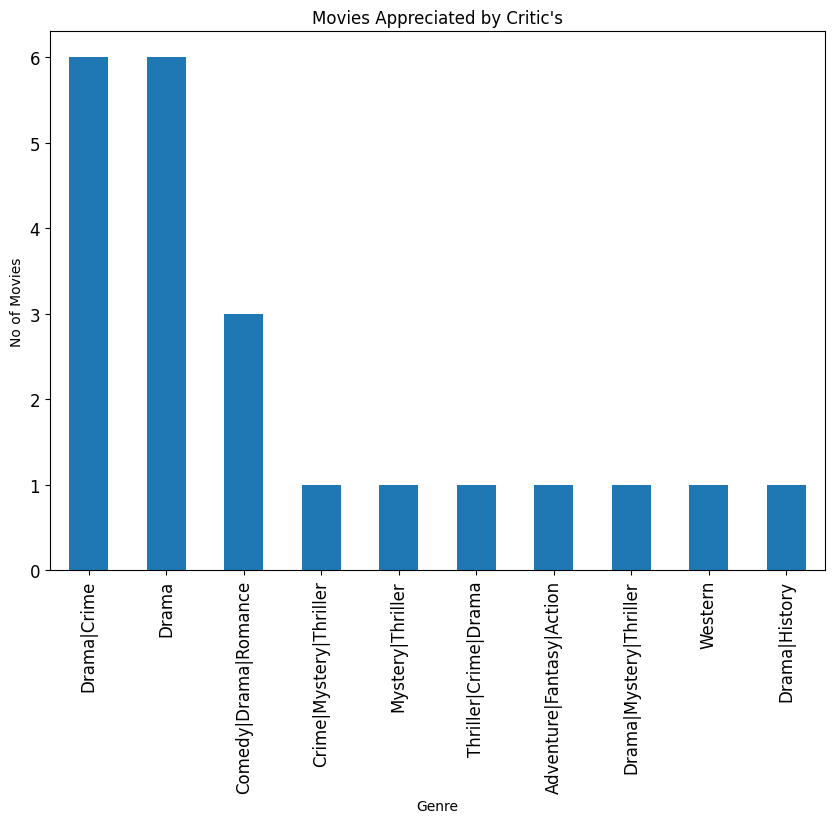

In [13]:
desirable = movies[movies['metascore'] > 80].sort_values(by=['metascore'],ascending=False)
desirable['genres'].value_counts()[:10].plot(kind='bar',figsize=(10,7),fontsize=12)
plt.xlabel('Genre')
plt.ylabel('No of Movies')
plt.title("Movies Appreciated by Critic's")

In [14]:
movie_title  = input()
movie_title = movies[movies['original_title'].str.contains(movie_title, na= False)]

sorted_movie_title = movie_title.sort_values(by='metascore', ascending= False)

print( sorted_movie_title[['original_title', 'year', 'metascore']])

Empty DataFrame
Columns: [original_title, year, metascore]
Index: []


In [15]:
cv = CountVectorizer(max_features= 5000, stop_words='english')

In [16]:
ps = PorterStemmer()

In [17]:
def stem(text):
    y = []

    for i in text.split():
        y.append(ps.stem(i))
    return " ".join(y)

In [18]:
movies['tagline'] = movies['tagline'].apply(stem)

In [19]:
vectors = cv.fit_transform(movies['tagline']).toarray()

In [20]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [21]:
cv.get_feature_names_out()

array(['000', '007', '05', ..., 'zero', 'zhivago', 'zombies'],
      dtype=object)

In [22]:
similarity = cosine_similarity(vectors)

In [23]:
sorted(list(enumerate(similarity[1])), reverse=True, key=lambda x: x[1])[1:6]


[(336, 0.6396021490668312),
 (8, 0.5222329678670936),
 (546, 0.5222329678670936),
 (125, 0.40451991747794525),
 (479, 0.40451991747794525)]

In [24]:
def recommend(movie):
    movie_index = movies[movies['original_title'] == movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x: x[1])[1:6]
    
    for i in movies_list:
        print(movies.iloc[i[0]].original_title ," ",movies.iloc[i[0]].metascore  )

In [25]:
recommend("Forrest Gump")

Judgment Night   65.0
Back to the Future Part II   74.0
Jaws   75.0
The Lord of the Rings: The Return of the King   81.0
The Interpreter   62.0
